### Tarea 10.1

Considere la función $y_{\theta}(x) = (\theta x)^2$.

Generamos datos ficticios con el siguiente código:

In [ ]:
np.random.seed(0)
x_data = np.linspace(0, 10, 30)
y_true = (x_data/2)**2
y_data = y_true + np.random.normal(0, 0.2, size=x_data.shape)

Realice un descenso de gradiente para ajustar el valor de $\theta$ empezando desde el punto $\theta = 1$ y de nuevo desde el punto $\theta = -1$. Explique la diferencia entre los resultados.

Solución: Primero partimos con $\theta = 1$

Iteración 0, Suma cuadrados: 34812.796875
Iteración 100, Suma cuadrados: 18866.27734375
Iteración 200, Suma cuadrados: 9345.4140625
Iteración 300, Suma cuadrados: 3719.7900390625
Iteración 400, Suma cuadrados: 929.91455078125
Iteración 500, Suma cuadrados: 40.40773391723633
Iteración 600, Suma cuadrados: 1.5741994380950928
Iteración 700, Suma cuadrados: 1.5989893674850464
Iteración 800, Suma cuadrados: 1.5900017023086548
Iteración 900, Suma cuadrados: 1.5900065898895264
Parámetro optimizado: [0.5005176]


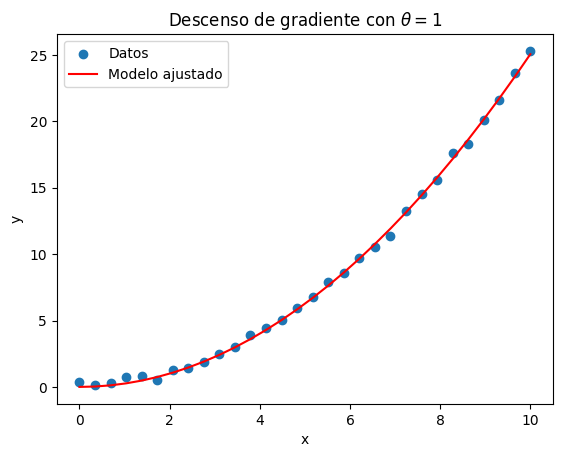

In [10]:
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

np.random.seed(0)
x_data = np.linspace(0, 10, 30)
y_true = (x_data/2)**2
y_data = y_true + np.random.normal(0, 0.2, size=x_data.shape)

def modelo(x, theta):
    return (theta[0]*x)**2

def suma_cuadrados(theta, x, y):
    predicciones = modelo(x, theta)
    return jnp.sum((y - predicciones)**2)

gradiente = jax.grad(suma_cuadrados)

def gradient_descent_rmsprop(theta, x, y, learning_rate=0.001, beta=0.9, epsilon=1e-8, iterations=1000):

    cache = jnp.zeros_like(theta)
    for i in range(iterations):
        grads = gradiente(theta, x, y)
        cache = beta * cache + (1 - beta) * (grads ** 2)  # Actualizar la media móvil de los gradientes al cuadrado
        theta = theta - learning_rate * grads / (jnp.sqrt(cache) + epsilon)  # Actualizar los parámetros

        if i % 100 == 0:
            loss = suma_cuadrados(theta, x, y)
            print(f"Iteración {i}, Suma cuadrados: {loss}")
    return theta


# Parámetros iniciales
theta_init = jnp.array([1.0])

theta_opt = gradient_descent_rmsprop(theta_init, x_data, y_data, learning_rate=0.001, iterations=1000)

# Parámetros encontrados
print("Parámetro optimizado:", theta_opt)

plt.scatter(x_data, y_data, label="Datos")
plt.plot(x_data, modelo(x_data, theta_opt), color="red", label="Modelo ajustado")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso de gradiente con $θ = 1$')
plt.show()

Ahora realizamos el mismo procedimiento pero con $\theta = -1$

Iteración 0, Suma cuadrados: 34812.796875
Iteración 100, Suma cuadrados: 18866.27734375
Iteración 200, Suma cuadrados: 9345.4140625
Iteración 300, Suma cuadrados: 3719.7900390625
Iteración 400, Suma cuadrados: 929.91455078125
Iteración 500, Suma cuadrados: 40.40773391723633
Iteración 600, Suma cuadrados: 1.5741994380950928
Iteración 700, Suma cuadrados: 1.5989893674850464
Iteración 800, Suma cuadrados: 1.5900017023086548
Iteración 900, Suma cuadrados: 1.5900065898895264
Parámetro optimizado: [-0.5005176]


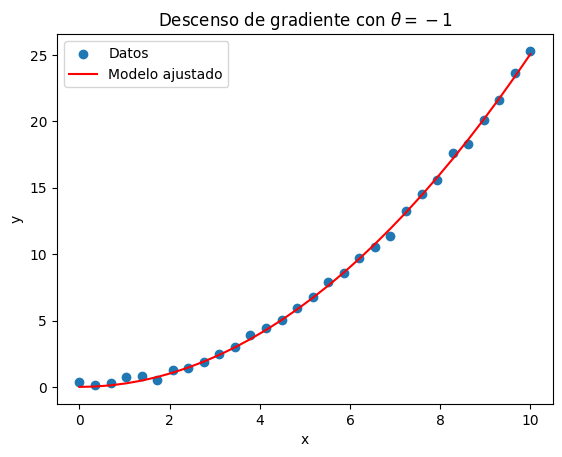

In [11]:
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

np.random.seed(0)
x_data = np.linspace(0, 10, 30)
y_true = (x_data/2)**2
y_data = y_true + np.random.normal(0, 0.2, size=x_data.shape)

def modelo(x, theta):
    return (theta[0]*x)**2

def suma_cuadrados(theta, x, y):
    predicciones = modelo(x, theta)
    return jnp.sum((y - predicciones)**2)

gradiente = jax.grad(suma_cuadrados)

def gradient_descent_rmsprop(theta, x, y, learning_rate=0.001, beta=0.9, epsilon=1e-8, iterations=1000):

    cache = jnp.zeros_like(theta)
    for i in range(iterations):
        grads = gradiente(theta, x, y)
        cache = beta * cache + (1 - beta) * (grads ** 2)  # Actualizar la media móvil de los gradientes al cuadrado
        theta = theta - learning_rate * grads / (jnp.sqrt(cache) + epsilon)  # Actualizar los parámetros

        if i % 100 == 0:
            loss = suma_cuadrados(theta, x, y)
            print(f"Iteración {i}, Suma cuadrados: {loss}")
    return theta


# Parámetros iniciales
theta_init = jnp.array([-1.0])

theta_opt = gradient_descent_rmsprop(theta_init, x_data, y_data, learning_rate=0.001, iterations=1000)

# Parámetros encontrados
print("Parámetro optimizado:", theta_opt)

plt.scatter(x_data, y_data, label="Datos")
plt.plot(x_data, modelo(x_data, theta_opt), color="red", label="Modelo ajustado")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso de gradiente con $θ = -1$')
plt.show()

Vemos que en el primer caso, el parámetro $\theta$ es positivo, y en el segundo caso, $\theta$ da el mismo valor pero negativo. Dado que la función está elevado al cuadrado, los gráficos son los mismos.